In [15]:
# Dependencies
%matplotlib inline
import json
import requests
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import matplotlib.colors as colors
import operator
from pprint import pprint


In [16]:
# File to Load 
p_moviedata = pd.read_csv("Movie2019/moviesapi_clean.csv")
p_moviedata.head()


,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,IMDB Rating,Revenue,Budget
0,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",7.8,2787965087,237000000
1,Pirates of the Caribbean: At World's End,2007,PG-13,169 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Mandarin, English",USA,7.1,961000000,300000000
2,Spectre,2015,PG-13,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","English, Spanish, Italian, German, French","UK, USA",6.8,880674609,245000000
3,The Dark Knight Rises,2012,PG-13,164 min,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Arabic","UK, USA",8.4,1084939099,250000000
4,John Carter,2012,PG-13,132 min,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",English,USA,6.6,284139100,260000000


In [17]:
# Create the bins in which Decade Data will be held
bins = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990, 2000,2010, 2020]

# Create the names for the four bins
group_names = ["1900-10","1910-20","1920-30","1930-40", "1940-50", "1950-60","1960-70", "1970-80", "1980-90", "1990-2000", "2000-2010","2010-2020"]

In [18]:
#Creating bins of Decade
p_moviedata["Decade"] = pd.cut(p_moviedata["Year"], bins, labels=group_names)
p_moviedata["Decade"].head()

0    2000-2010
1    2000-2010
2    2010-2020
3    2010-2020
4    2010-2020
Name: Decade, dtype: category
Categories (12, object): [1900-10 < 1910-20 < 1920-30 < 1930-40 ... 1980-90 < 1990-2000 < 2000-2010 < 2010-2020]

In [19]:
p_moviedata['Profit']=p_moviedata['Revenue']-p_moviedata['Budget']

In [20]:

bin_df2 = p_moviedata.groupby("Decade")

#p=bin_df2.max()
#p
bin_max=bin_df2 ["Profit","Budget"]
bin_max.max()

,Profit,Budget
Decade,,
1900-10,0,0
1910-20,7361566,8500000
1920-30,21755000,92620000
1930-40,396176459,40000000
1940-50,266589150,6000000
1950-60,32000000,100000000
1960-70,278014286,45000000
1970-80,463654000,55000000
1980-90,782410554,144000000


In [21]:
# Average Revenue Per Decade
year_sum = p_moviedata.groupby('Decade')
count_year1 = bin_df2 ["Revenue"].mean()
count_year1

#t=bin_df2.agg({"Revenue": "sum"})

Decade
1900-10      0.000000e+00
1910-20      1.586157e+07
1920-30      1.495835e+07
1930-40      5.021574e+07
1940-50      1.741495e+07
1950-60      1.582725e+07
1960-70      3.051928e+07
1970-80      5.197838e+07
1980-90      7.228688e+07
1990-2000    7.621092e+07
2000-2010    8.055655e+07
2010-2020    1.124209e+08
Name: Revenue, dtype: float64

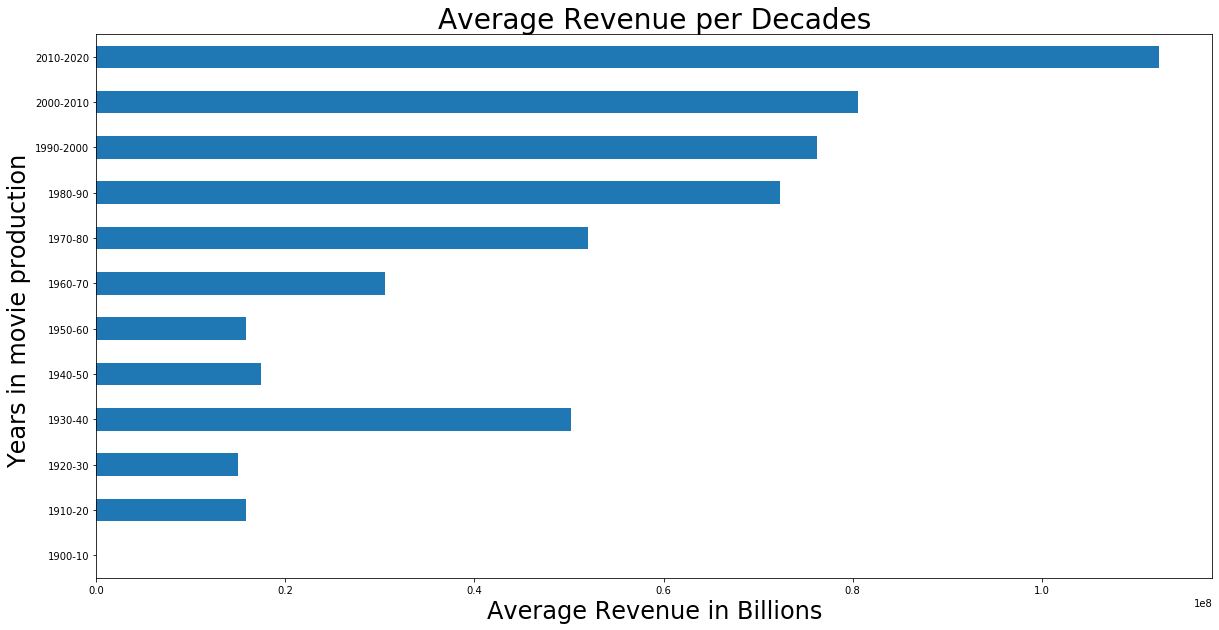

<Figure size 432x288 with 0 Axes>

In [22]:
#Plot Bar Graph for average revenue per decade

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
colors_list = list(colors._colors_full_map.values())
color_counter = 25
count_chart2 = count_year1.plot(kind='barh')

# Set the xlabel and ylabel using class methods
count_chart2.set_xlabel("Average Revenue in Billions", fontsize=24)
count_chart2.set_ylabel("Years in movie production ", fontsize=24)

plt.title("Average Revenue per Decades", fontsize=28)
plt.legend
plt.show()
plt.tight_layout()



In [23]:
#Genre_df = pd.DataFrame({'Title' : p_moviedata['Title'],
 #                          'Genre': p_moviedata['Genre']})

#Genre_df.head()

In [24]:
#Create dataframe for frequency of Genre in movie dataset

Genre_df = pd.DataFrame({'Title' : p_moviedata['Title'],
                           'Genre': p_moviedata['Genre']})

#print(moviedata['Genre'])

# Use function to convert string to a list
def Convert(string): 
    li = list(string.split(",")) 
    return li 

# list to hold all Genre contained in dataset
l_Genre = []
for Genre in p_moviedata['Genre']:
   
    title_language_list = (Convert(str(Genre)))
    for individual_Genre in title_language_list:
        if individual_Genre != "nan":
            l_Genre.append(individual_Genre)

#Create second dataframe to store and sort all Genre spoken in movie dataset
Genre_df2 = pd.DataFrame({'Genre':l_Genre})

#Grouping by Genre to calculate total occurance

grouped_Genre_df2 = Genre_df2.groupby(["Genre"])
Genre_count = grouped_Genre_df2["Genre"].count()
movie_total = len(p_moviedata["Title"])
l_percentage = round(((Genre_count/movie_total)*100), 2)

#print(l_percentage)

# Convert to DataFrame
Genre_df3 = pd.DataFrame({"Count":Genre_count, "Percent Total": l_percentage})
Genre_df3
Genre_df3 = Genre_df3.sort_values("Count", ascending=False)
Genre_df3


,Count,Percent Total
Genre,,
Drama,1554,33.92
Thriller,1308,28.55
Comedy,1185,25.86
Action,1034,22.57
Romance,1025,22.37
Drama,870,18.99
Adventure,611,13.33
Sci-Fi,572,12.48
Comedy,540,11.79


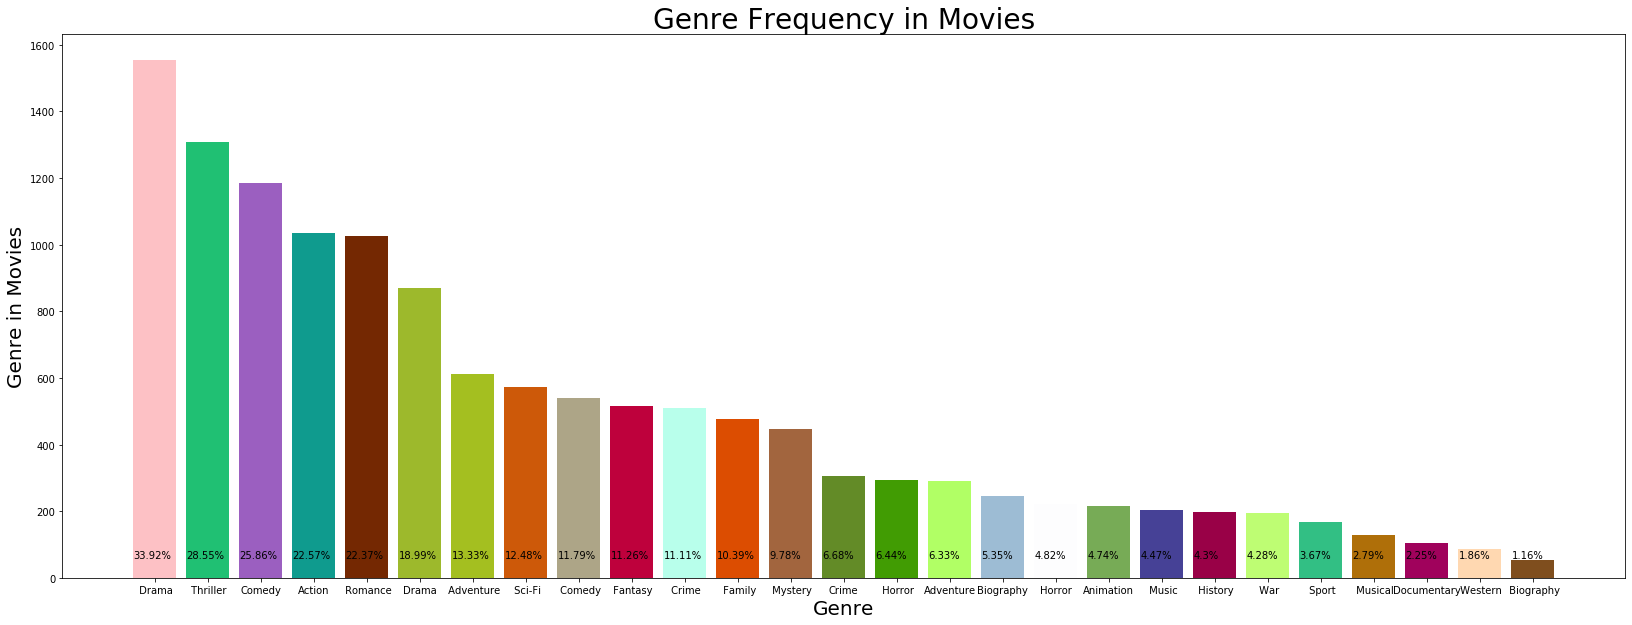

In [25]:
#Plot Bar Graph
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(28)

Genre_names = Genre_df3.index.values
x_axis = []
y_axis = []
label = []
colors_list = list(colors._colors_full_map.values())
color_counter = 81

for Genre_name in Genre_names:
    color_counter = color_counter + 7
    if Genre_df3.loc[Genre_name, "Percent Total"] > 1:
        x_axis.append(Genre_name)
        y_axis.append(Genre_df3.loc[Genre_name, "Count"])
        label.append((Genre_df3.loc[Genre_name,"Percent Total"]))

for j in range(len(x_axis)):
    ax.bar(x_axis[j], y_axis[j], color = colors_list[color_counter], align="center")
    color_counter = color_counter + 1
    label_percent = str(label[j]) + "%"
    ax.text(j-.4, 60, label_percent, style='normal', fontsize=10)


# Give the chart a title, x label, and y label

plt.title("Genre Frequency in Movies", fontsize=28)
plt.xlabel("Genre", fontsize=20)
plt.ylabel("Genre in Movies", fontsize=20)
plt.legend


# Save the Figure
fig.savefig("Genre frequency in Movies")




In [27]:
#Genre_df2